In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import librosa
from pathlib import Path

Duplicate key in file PosixPath('/opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family: NanumGothic')


In [4]:
# total
data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Prepare_data/data/total.csv'
train_data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Prepare_data/data/total_train.csv'
test_data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Prepare_data/data/total_test.csv'
# test_data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Prepare_data/data/total_test.csv'

In [5]:
# data_df = pd.read_csv(data_file)
test_data_df = pd.read_csv(test_data_file)

In [6]:
print(f'test 시간 합계 : {test_data_df.duration.sum()/3600}')
test_data_df.describe()

토탈 시간 합계 : 304.4873172222222


,duration
count,135704.000000
mean,8.077539
std,6.582246
min,0.100000
25%,3.930000
50%,6.526000
75%,10.010000
max,190.459000


In [7]:
# 강원
gw_data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Prepare_data/data/gw.csv'
gw_test_data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Prepare_data/data/gw_test.csv'

In [8]:
gw_data_df = pd.read_csv(gw_data_file)
gw_test_data_df = pd.read_csv(gw_test_data_file)

In [10]:
print(f'test 시간 합계 : {gw_test_data_df.duration.sum()/3600}')
gw_test_data_df.describe()

test 시간 합계 : 54.423626944444436


,duration
count,22979.000000
mean,8.526266
std,7.200755
min,0.100000
25%,3.639000
50%,6.730000
75%,10.973000
max,96.039000


In [15]:
gw_test_data_df.sort_values(by=['duration']).head(300)

,ID,duration,wav,province_code,wrd
18619,talk_set3_collectorgw77_speakergw2325_speakerg...,0.100,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,응
17956,talk_set3_collectorgw78_speakergw2040_speakerg...,0.100,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,응
7362,talk_set1_collectorgw226_speakergw2865_speaker...,0.100,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,예
15497,talk_set1_collectorgw226_speakergw2850_speaker...,0.100,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,예
9106,talk_set2_collectorgw94_speakergw1497_speakerg...,0.100,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,어
...,...,...,...,...,...
4303,say_set1_collectorgw179_speakergw989_38_0_26-1,0.619,/data/MTDATA/fn-2-018/sentence/person/say/gw/c...,gw,그져
21747,say_set1_collectorgw130_speakergw1473_36_0_36-5,0.626,/data/MTDATA/fn-2-018/sentence/person/say/gw/c...,gw,엄마를 했잖아
22345,talk_set2_collectorgw88_speakergw415_speakergw...,0.626,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,그래야 돼요 맞아
7399,talk_set3_collectorgw89_speakergw567_speakergw...,0.627,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,그렇게 안 아파요


In [12]:
gw_test_data_df.sort_values(by=['duration'], ascending=False).head(10)

,ID,duration,wav,province_code,wrd
14112,talk_set2_collectorgw95_speakergw1125_speakerg...,96.039,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,아이고 속이 시끄러울 때 가서 풀을 뽑아 보니까 어느 적엔가 잊어버리고 무념무상이 ...
6553,talk_set3_collectorgw128_speakergw1076_speaker...,92.659,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,차례를 꼭 지내야 할 필요는 없다고 생각하는데요 옛날에는 음 그게 예의고 예법이고 ...
3501,talk_set1_collectorgw226_speakergw2913_speaker...,89.180,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,왜 글나 하면은 사람이 그 체온이 낮아지문 각종 면역력도 떨어지고 병도 생기고 없던...
18394,talk_set2_collectorgw87_speakergw1157_speakerg...,82.289,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,나는 어 기호로 치면은 고기보다는 회를 더 좋아하는 더 좋아해 왜냐하면 어 나는 그...
17124,talk_set2_collectorgw87_speakergw1157_speakerg...,76.449,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,난 산하고 바다를 굳이 따지자면 산이야 왜냐하면 난 어렸을 때 항상 바다를 갔었던 ...
15885,say_set1_collectorgw137_speakergw2427_46_0_73-0,71.779,/data/MTDATA/fn-2-018/sentence/person/say/gw/c...,gw,아이고 온돌방은요 엄청 추워요 온돌방은 아랫문만 딱딱하지 저 위에는 완전히 뭐 차가...
17829,say_set2_collectorgw103_speakergw461_16_0_71-0,69.669,/data/MTDATA/fn-2-018/sentence/person/say/gw/c...,gw,네 어렸을 때는 온돌방에 살았거든요 그래서 그런지 건강해요 지금 보면 온돌방이 찜질...
5110,talk_set1_collectorgw74_speakergw1562_speakerg...,67.549,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,맞는 말인데 옛 엣엣 옛날에는 나이 드신 분들이 당연히 또 젊은 사람들이 힘들 것 ...
940,talk_set1_collectorgw167_speakergw1911_speaker...,67.363,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,예 민간 요법이 중요한 게 뭐 많죠 민간 요법이라는 거는 일단 응급 처치 부터 뭐 ...
18256,talk_set2_collectorgw101_speakergw2078_speaker...,66.029,/data/MTDATA/fn-2-018/sentence/people/talk/gw/...,gw,는 산이 산이 더 좋은데 바다는 기냥 멀리서 보는 것만 좋지 막상 여름에 가면은 바...


In [4]:
train_data_df.describe()

,duration
count,140375.000000
mean,7.740898
std,5.947517
min,0.090000
25%,3.290000
50%,6.159000
75%,10.523500
max,30.000000


In [5]:
train_data_df.duration.sum()/3600

301.84128444444445

In [8]:
# 경상
data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Tokenizer/results/data_prepared/gs/total.csv'
train_data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Tokenizer/results/data_prepared/gs/train.csv'
# Path(data_file).stem

In [9]:
data_df = pd.read_csv(data_file)
train_data_df = pd.read_csv(train_data_file)

In [10]:
print(f'토탈 시간 합계 : {data_df.duration.sum()/3600}')
data_df.describe()

토탈 시간 합계 : 655.1751263888889


,duration
count,290682.000000
mean,8.114126
std,5.705776
min,0.073000
25%,4.187250
50%,6.720000
75%,10.429000
max,30.000000


[Text(0.5, 1.0, 'gs')]

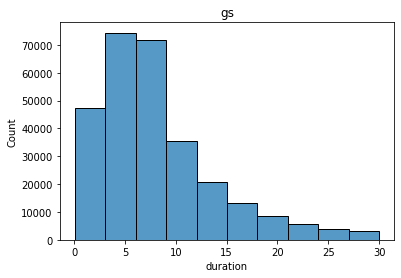

In [42]:
hist, edges = np.histogram(train_data_df.duration, 10)
sns.histplot(data_df.duration, bins=10, kde=False).set(title='gs')

[Text(0.5, 1.0, 'gs')]

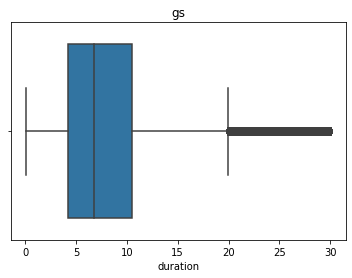

In [43]:
sns.boxplot(x = data_df.duration).set(title='gs')

In [44]:
data_df.duration.sum()/3600

337.27309527777777

In [45]:
train_data_df.describe()

,duration
count,119642.000000
mean,8.439290
std,6.320624
min,0.100000
25%,3.590000
50%,6.795000
75%,11.650000
max,30.000000


In [46]:
train_data_df.duration.sum()/3600

280.47042194444447

In [29]:
# 전라
data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Tokenizer/results/data_prepared/jl/total.csv'
train_data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Tokenizer/results/data_prepared/jl/train.csv'

In [30]:
data_df = pd.read_csv(data_file)
train_data_df = pd.read_csv(train_data_file)

In [31]:
print(f'토탈 시간 합계 : {data_df.duration.sum()/3600}')
data_df.describe()

토탈 시간 합계 : 271.1569672222222


,duration
count,127279.000000
mean,7.669491
std,5.577207
min,0.086000
25%,3.530000
50%,6.399000
75%,10.223000
max,30.000000


[Text(0.5, 1.0, 'jl')]

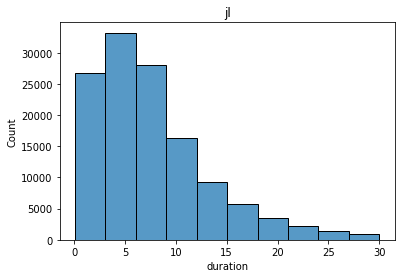

In [32]:
hist, edges = np.histogram(train_data_df.duration, 10)
sns.histplot(data_df.duration, bins=10, kde=False).set(title='jl')

[Text(0.5, 1.0, 'jl')]

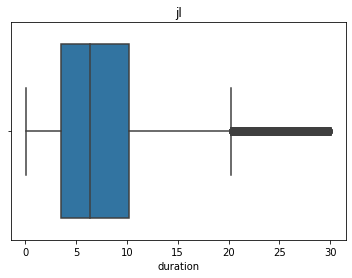

In [33]:
sns.boxplot(x = data_df.duration).set(title='jl')

In [51]:
train_data_df.describe()

,duration
count,21112.000000
mean,7.055797
std,5.524324
min,0.100000
25%,2.890000
50%,5.565500
75%,9.745000
max,29.999000


In [52]:
train_data_df.duration.sum()/3600

41.37833166666667

In [2]:
# 제주
data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Tokenizer/results/data_prepared/jj/total.csv'
train_data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Tokenizer/results/data_prepared/jj/train.csv'

In [3]:
data_df = pd.read_csv(data_file)
train_data_df = pd.read_csv(train_data_file)

In [4]:
print(f'토탈 시간 합계 : {data_df.duration.sum()/3600}')
data_df.describe()

토탈 시간 합계 : 50.77265388888889


,duration
count,25848.000000
mean,7.071400
std,5.806957
min,0.100000
25%,3.210000
50%,4.712000
75%,8.980750
max,29.999000


In [17]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)

In [19]:
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#      print(corpNP[corpNP['사업장명'].str.contains('하나은행')])

In [21]:
pd.set_option('display.max.colwidth', None)

In [22]:
train_data_df.nlargest(n=10, columns=['duration']).wav

9169     /data/MTDATA/fn-2-018/root/person/say/jj/collectorjj79/say_set3_collectorjj79_speakerjj603_21_0_100-4.wav
11506     /data/MTDATA/fn-2-018/root/person/say/jj/collectorjj84/say_set1_collectorjj84_speakerjj523_11_0_37-1.wav
8434      /data/MTDATA/fn-2-018/root/person/say/jj/collectorjj79/say_set1_collectorjj79_speakerjj579_34_0_82-1.wav
10531     /data/MTDATA/fn-2-018/root/person/say/jj/collectorjj86/say_set2_collectorjj86_speakerjj590_16_0_60-3.wav
6461      /data/MTDATA/fn-2-018/root/person/say/jj/collectorjj83/say_set3_collectorjj83_speakerjj535_27_0_51-2.wav
7210        /data/MTDATA/fn-2-018/root/person/say/jj/collectorjj58/say_set1_collectorjj58_speakerjj417_14_0_31.wav
8214         /data/MTDATA/fn-2-018/root/person/say/jj/collectorjj79/say_set1_collectorjj79_speakerjj561_1_0_31.wav
2168        /data/MTDATA/fn-2-018/root/person/say/jj/collectorjj71/say_set2_collectorjj71_speakerjj491_52_0_31.wav
11337    /data/MTDATA/fn-2-018/root/person/say/jj/collectorjj86/say_set1_collect

In [16]:
train_data_df.nlargest(n=10, columns=['duration'])

,ID,duration,wav,province_code,wrd
9169,jj-say_set3_collectorjj79_speakerjj603_21_0_100-4,29.999,/data/MTDATA/fn-2-018/root/person/say/jj/colle...,jj,그래서 자꾸 축구 선수 해가지고 축구 감독이 뒛더라면은 지금의 내가 더 나은 생활과...
11506,jj-say_set1_collectorjj84_speakerjj523_11_0_37-1,29.984,/data/MTDATA/fn-2-018/root/person/say/jj/colle...,jj,무사닌허면은 날씨가 자연이 이 이 자연이 체 거의 뭐 차지한다고 하지만 거기에 또 ...
8434,jj-say_set1_collectorjj79_speakerjj579_34_0_82-1,29.969,/data/MTDATA/fn-2-018/root/person/say/jj/colle...,jj,경행 빨래 행오민 돈 혼 십원씩 주면 그걸로 삥이엔 해그니 머리핀 요런 거 그런 거...
10531,jj-say_set2_collectorjj86_speakerjj590_16_0_60-3,29.903,/data/MTDATA/fn-2-018/root/person/say/jj/colle...,jj,솔잎 솔잎인디 그 솔잎 긁어당 영 줄 줄 이렇게 줄 칙 칙 칙이죠 지금 생각하면 그...
6461,jj-say_set3_collectorjj83_speakerjj535_27_0_51-2,29.889,/data/MTDATA/fn-2-018/root/person/say/jj/colle...,jj,그런데 이제 버스 정류소가 조금 멀어서 이제 안 좋은 것 같고 음 그리고 이제 병원...
7210,jj-say_set1_collectorjj58_speakerjj417_14_0_31,29.879,/data/MTDATA/fn-2-018/root/person/say/jj/colle...,jj,요자기 한 보름 뒛수다 보름 전에 잔칫집에 가는디 누게 잔치냐면 저기 우리 아주 딸...
8214,jj-say_set1_collectorjj79_speakerjj561_1_0_31,29.849,/data/MTDATA/fn-2-018/root/person/say/jj/colle...,jj,아이고 지금 사는 아파트에서는 이 지금 한 십년째 살암신디 그전에는 대단지 아파트에...
2168,jj-say_set2_collectorjj71_speakerjj491_52_0_31,29.839,/data/MTDATA/fn-2-018/root/person/say/jj/colle...,jj,옛날 부엌은 낭불 때고 밥 허곡 국 허고 또 곤로도 써낫고 지금은 집 안에서 서근에...
11337,jj-say_set1_collectorjj86_speakerjj541_12_0_118-3,29.830,/data/MTDATA/fn-2-018/root/person/say/jj/colle...,jj,이제는 그 집에서는 그 뭐 돼지 삶고 그런 거는 없기 때문에 뼈 사다가 등뼈 나는 ...
11664,jj-say_set1_collectorjj84_speakerjj523_9_0_30,29.799,/data/MTDATA/fn-2-018/root/person/say/jj/colle...,jj,형제들이랑 사이좋게 지냄신지 말암신지 그거는 모르고 그냥 나 마음으로만 나 모음 속...


[Text(0.5, 1.0, 'jj')]

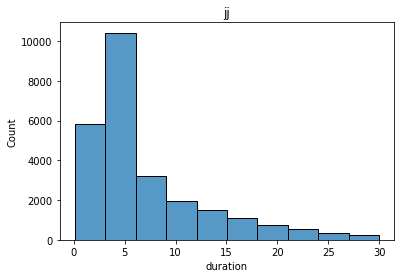

In [5]:
hist, edges = np.histogram(train_data_df.duration, 10)
sns.histplot(data_df.duration, bins=10, kde=False).set(title='jj')

[Text(0.5, 1.0, 'jj')]

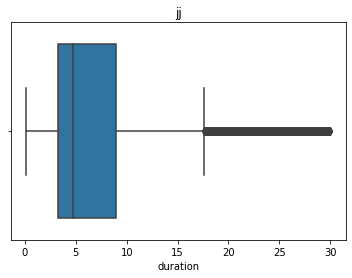

In [6]:
sns.boxplot(x = data_df.duration).set(title='jj')

In [7]:
train_data_df.describe()

,duration
count,20678.000000
mean,7.853957
std,6.202036
min,0.100000
25%,3.384250
50%,5.319000
75%,10.839000
max,29.999000


In [58]:
train_data_df.duration.sum()/3600

1.6082502777777778

In [1]:
# 충청
data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Tokenizer/results/data_prepared/cc/total.csv'
train_data_file = '/workspace/speechbrain/recipes/KdialectSpeech/Tokenizer/results/data_prepared/cc/train.csv'

In [4]:
data_df = pd.read_csv(data_file)
train_data_df = pd.read_csv(train_data_file)

In [5]:
print(f'토탈 시간 합계 : {data_df.duration.sum()/3600}')
data_df.describe()

토탈 시간 합계 : 191.36273694444444


,duration
count,102881.000000
mean,6.696143
std,4.432956
min,0.100000
25%,3.659000
50%,5.979000
75%,8.459000
max,29.999000


[Text(0.5, 1.0, 'cc')]

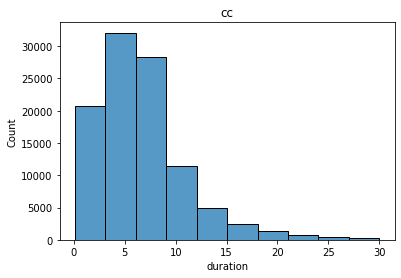

In [53]:
hist, edges = np.histogram(train_data_df.duration, 10)
sns.histplot(data_df.duration, bins=10, kde=False).set(title='cc')

[Text(0.5, 1.0, 'cc')]

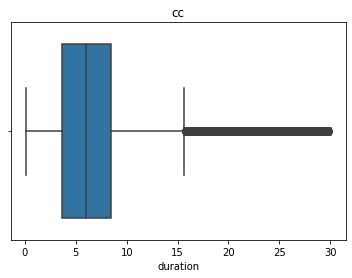

In [54]:
sns.boxplot(x = data_df.duration).set(title='cc')

In [63]:
train_data_df.describe()

,duration
count,19225.000000
mean,7.010365
std,5.246368
min,0.100000
25%,3.199000
50%,5.699000
75%,9.300000
max,29.963000


In [64]:
train_data_df.duration.sum()/3600

37.43729472222222

In [42]:
# KsponSpeech
train_data_file = '/workspace/speechbrain/recipes/KsponSpeech/Tokenizer/results/5K_subword_unigram_LM/train.csv'

In [43]:
train_data_df = pd.read_csv(train_data_file)

In [44]:
print(f'토탈 시간 합계 : {train_data_df.duration.sum()/3600}')
train_data_df.describe()

토탈 시간 합계 : 965.1538041666665


,duration,spk_id
count,620000.000000,620000.000000
mean,5.604119,310000.500000
std,4.564674,178978.727786
min,0.998938,1.000000
25%,2.462000,155000.750000
50%,4.120000,310000.500000
75%,7.228000,465000.250000
max,30.997000,620000.000000


[Text(0.5, 1.0, 'KsponSpeech')]

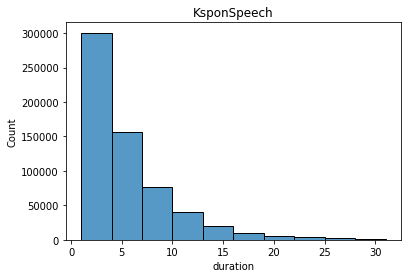

In [45]:
hist, edges = np.histogram(train_data_df.duration, 10)
sns.histplot(train_data_df.duration, bins=10, kde=False).set(title='KsponSpeech')

[Text(0.5, 1.0, 'KsponSpeech')]

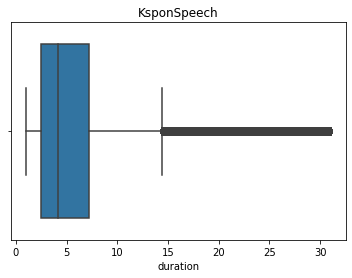

In [46]:
sns.boxplot(x = train_data_df.duration).set(title='KsponSpeech')

In [65]:
# sr_abnormal_list = []
# for file_path in data_df.wav:
#     frame_rate = librosa.get_samplerate(file_path)
#     if frame_rate != 16000:
#         # print(f'sample rate {frame_rate} : {file_path}')
#         name = Path(file_path).stem
#         # if '-' not in name:
#         #     print(name)
#         #     sr_abnormal_list.append(name)
        
#         # sr_abnormal_list.append(name)
#         sr_abnormal_list.append(file_path)

#         # ar_abnormal = f'sample rate {frame_rate} : {file_path}'
#         # sr_abnormal_list.append(ar_abnormal)

# sr_abnormal_df = pd.DataFrame(sr_abnormal_list)
# sr_abnormal_df.to_csv('sr_48k_2.csv')

In [66]:
# len(sr_abnormal_list)

In [67]:
# sr_abnormal_list[:100]

In [68]:
# sr_abnormal_list #[:10]

In [69]:
# for sr_abnormal in sr_abnormal_list:
#     if '-' not in sr_abnormal:
#         print(sr_abnormal)

In [70]:
# data_file_2 = '/speechbrain/recipes/KdialectSpeech/Tokenizer/results/2K_subword_unigram_LM/gs/train.csv'

In [71]:
# data_df_2 = pd.read_csv(data_file_2)

In [72]:
# data_df_2.describe()